Hello, This is my Data mining project 1. Today, we will be doing analysis on the Nike sales dataset (2024). As one of the world's leading sportswear brands and due to constantly evolving market landscape, Nike must leverage the data available to drive strategic business decisions, enhance the customer experience, and optimize sales globally. Nike's global sales performance is influenced by multiple factors, such as regional preferences, type of products, seasonality, pricing strategies, and the customer's behavior. Today, I will assume the role of a data analyst working at Nike and I am tasked to identify high performing markets, optimize inventory, and maximize revenue by adjusting market strategies. In order for that to be done, a data driven approach is required.

### The aim of this analysis 

As a data analyst working at Nike, I need to analyze Nike's global sales data for 2024 and uncover major trends, find growth opportunities, and optimize business strategies. Some of the questions we aim to answer include the following:

1. Which countries or regions generate the highest sales revenue?
2. Are there any specific months or quarters of the year with higher sales volumes globally or in a region?
3. What is the most popular product in a region or country?
4. How do discounts affect sales and the total revenue?
5. Are there inventory issues where there is overstock or understock in any region?
6. Can future sales be predicted using the data available? Can we predict customer behavior based on their purchase history?


### About the data

The Link to the Dataset : [Nike Sales (2024)](https://www.kaggle.com/datasets/ayushcx/nike-global-sales-data-2024/data)

The Nike sales dataset was found on kaggle.com. It is a comprehensive dataset of Nike's global sales for 2024, including multiple regions, product categories, and price tiers. It is ideal for sales and revenue analysis, creating machine learning models to predict sales, and identifying trends. The features of this dataset are:
- Month: month of sales
- Region: The Geographic region
- Main Category: High level product category
- Sub Category: Specific product category within a main category
- Product Line: product series or models
- Price Tier: pricing tier
- Units Sold: number of units sold
- Revenue (USD): Total revenue
- Online Sales Percentage: % of sales through online platforms
- Retail Price: price per unit in USD


The Dataset includes 1000 rows and 10 columns of data!

### Exploring and cleaning the data

Before we start doing analysis, we need to explore and clean the data to identify any missing values, outliers, or any inconsistencies. We need to load the dataset and check its structure and contents.

In [24]:
# Importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Import done")

Import done


In [25]:
# Creating a dataframe
df = pd.read_csv("/Users/ahmadjebril/Downloads/nike_sales_2024.csv")
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [26]:
# we can look at the columns and their type
df.dtypes

Month                      object
Region                     object
Main_Category              object
Sub_Category               object
Product_Line               object
Price_Tier                 object
Units_Sold                  int64
Revenue_USD                 int64
Online_Sales_Percentage     int64
Retail_Price                int64
dtype: object

In [27]:
# we can look at the shape and the index values of the dataset
print("The index is: " + str(df.index))
print("The shape is: " + str(df.shape))

The index is: RangeIndex(start=0, stop=1000, step=1)
The shape is: (1000, 10)


In [28]:
# Summary statistics
df.describe()

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,28498.951000,5.039576e+06,70.040000,176.32000
std,12926.495678,3.267217e+06,11.748635,75.26169
min,5028.000000,2.874000e+05,50.000000,50.00000
25%,17554.250000,2.344675e+06,60.000000,110.00000
50%,28685.000000,4.328020e+06,71.000000,180.00000
75%,40026.000000,7.264942e+06,80.000000,240.00000
max,49992.000000,1.486470e+07,90.000000,300.00000


In [29]:
# Checking for null values
df.isnull().sum()

Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64

We have no missing values. However, there is a couple of pre-processing steps we need to take!

### Preprocessing the data

1. We need to convert the column "Month" to a Datetime format for proper sorting and analysis. We need to map the months to numbers.

In [30]:
# Create a dictionary mapping each month to a number
month_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}

df["Month_Numbered"] = df["Month"].map(month_dict) # creating a new column
df = df.sort_values(by="Month_Numbered") # sorting by month
df.dtypes # checking

Month                      object
Region                     object
Main_Category              object
Sub_Category               object
Product_Line               object
Price_Tier                 object
Units_Sold                  int64
Revenue_USD                 int64
Online_Sales_Percentage     int64
Retail_Price                int64
Month_Numbered              int64
dtype: object

2. We need to encode the column "Price_Tier" as an ordinal variable rather than having an inherent order

In [31]:
# Encoding Price_Tier
df["Price_Tier"] = df["Price_Tier"].replace(['Budget','Mid-Range','Premium'], [1,2,3])
df.head()

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34315/369854053.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Price_Tier"] = df["Price_Tier"].replace(['Budget','Mid-Range','Premium'], [1,2,3])


,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Month_Numbered
1,January,India,Equipment,Accessories,Hats,1,9842,2066820,50,210,1
74,January,South Korea,Footwear,Basketball,KD Series,1,9847,2067870,72,210,1
82,January,Greater China,Equipment,Bags,Gym Sack,1,17746,2839360,78,160,1
90,January,Southeast Asia,Equipment,Bags,Backpack,1,26666,3199920,85,120,1
528,January,America,Footwear,Cricket,Vapor Cricket,1,28077,3930780,66,140,1


3. We need to check for duplicates and remove them to avoid skewing the analysis

In [32]:
# Checking for duplicates using an f string
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


There isn't any duplicate rows so no further action is needed

4. We need to normalize the column "Online_Sales_Percentage" and convert it to a 0-1 scale, making it easier for analysis.

In [33]:
# dividing the column by 100
df["Online_Sales_Percentage"] = df["Online_Sales_Percentage"] / 100

5. We need to check for inconsistencies in categorical variables

In [34]:
# ensuring region names are consistent
print(df["Region"].unique())

['India' 'South Korea' 'Greater China' 'Southeast Asia' 'America' 'Europe'
 'Japan']


In [35]:
print(df["Product_Line"].unique())

['Hats' 'KD Series' 'Gym Sack' 'Backpack' 'Vapor Cricket' 'Windrunner'
 'Tech Fleece' 'Bags' 'Therma-FIT' 'Blazer' 'Crew Socks' 'Mercurial'
 'Performance Socks' 'Rain Jacket' 'Dri-FIT' 'Compression Wear'
 'React Infinity' 'Air Zoom' 'Pegasus' 'Air Jordan' 'Air Max'
 'Air Force 1' 'LeBron Series' 'Phantom Vision']


In [36]:
print(df["Main_Category"].unique())

['Equipment' 'Footwear' 'Apparel']


In [37]:
print(df["Sub_Category"].unique())

['Accessories' 'Basketball' 'Bags' 'Cricket' 'Outerwear' 'Tops'
 'Lifestyle' 'Socks' 'Football' 'Performance' 'Running']


There is no inconsistencies! No further changes are needed :)

6. We can derive a discount percentage by comparing retail price and total revenue to check if any discounts were applied

In [38]:
# checking if any discounts were applied
df["Discount_Percent"] = 1 - (df["Revenue_USD"] / (df["Units_Sold"] * df["Retail_Price"]))
df["Discount_Percent"] = df["Discount_Percent"].clip(0, 1)
df.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Month_Numbered,Discount_Percent
1,January,India,Equipment,Accessories,Hats,1,9842,2066820,0.50,210,1,0.0
74,January,South Korea,Footwear,Basketball,KD Series,1,9847,2067870,0.72,210,1,0.0
82,January,Greater China,Equipment,Bags,Gym Sack,1,17746,2839360,0.78,160,1,0.0
90,January,Southeast Asia,Equipment,Bags,Backpack,1,26666,3199920,0.85,120,1,0.0
528,January,America,Footwear,Cricket,Vapor Cricket,1,28077,3930780,0.66,140,1,0.0


7. We need to check for outliers that could potentially distort insights using standard deviation methods

In [39]:
# Creating a function detecting outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# applying the function to numerical columns
numeric_columns = ["Units_Sold", "Revenue_USD", "Retail_Price"]
for col in numeric_columns:
    df = detect_outliers(df, col)

In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 986
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    999 non-null    object 
 1   Region                   999 non-null    object 
 2   Main_Category            999 non-null    object 
 3   Sub_Category             999 non-null    object 
 4   Product_Line             999 non-null    object 
 5   Price_Tier               999 non-null    int64  
 6   Units_Sold               999 non-null    int64  
 7   Revenue_USD              999 non-null    int64  
 8   Online_Sales_Percentage  999 non-null    float64
 9   Retail_Price             999 non-null    int64  
 10  Month_Numbered           999 non-null    int64  
 11  Discount_Percent         999 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 101.5+ KB


### Visualizing the data

Now that we have explored the data, we can start to visualize it!

1. Which countries or regions generate the highest sales revenue?

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34315/4155834429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="Revenue_USD", y="Region", palette="Blues_r")


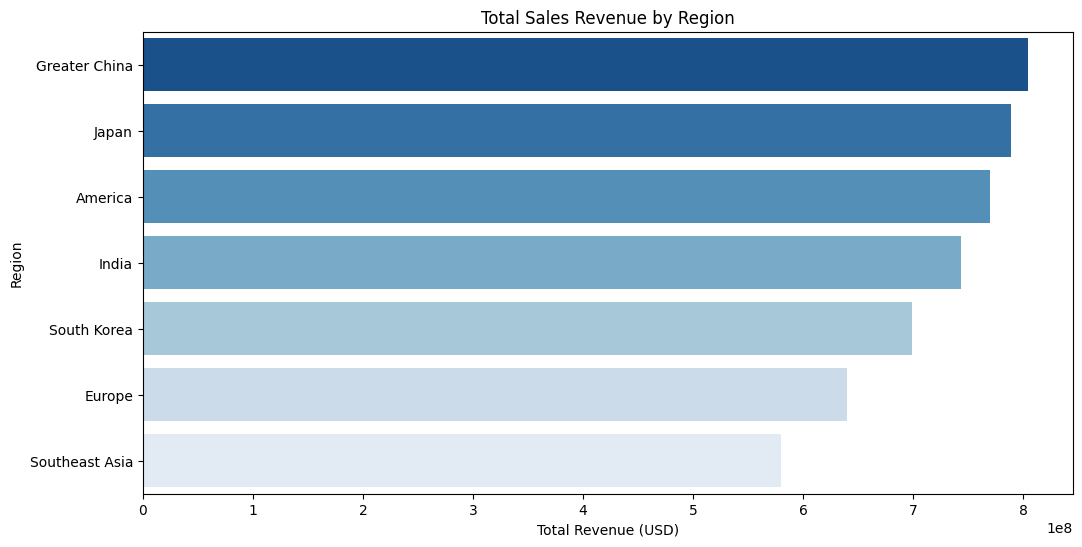

In [41]:
# Grouping by region and summing up the revenue to create a bar chart
region_sales = df.groupby("Region")["Revenue_USD"].sum().reset_index().sort_values(by="Revenue_USD", ascending=False)

# creating the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x="Revenue_USD", y="Region", palette="Blues_r")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Region")
plt.title("Total Sales Revenue by Region")
plt.show()

Looking at the barplot, we can conclude that Greater China is leading total sales by region in 2024. 

2. Are there any specific months or quarters with higher sales volume globally?

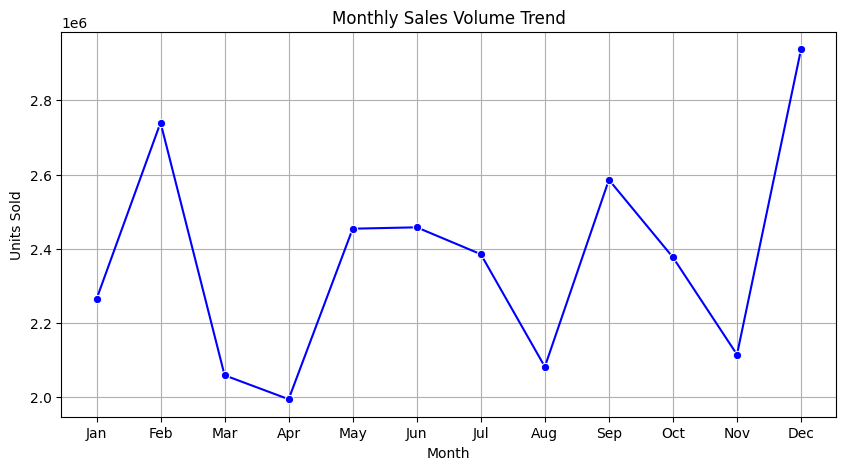

In [42]:
# Grouping by month_numbered column to see global sales trend
monthly_sales = df.groupby("Month_Numbered")["Units_Sold"].sum().reset_index()

# Creating the plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x="Month_Numbered", y="Units_Sold", marker="o", color="blue")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.title("Monthly Sales Volume Trend")
plt.xticks(range(1, 13),
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()

Looking at the line plot, we can conclude that the sales tend to peak around the holiday season in December. Monthly sales are the lowest in April and tend to increase around the summer time.

We can also group the sales by the Quarter!

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34315/3427370240.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x="Quarter", y="Units_Sold", palette="coolwarm")


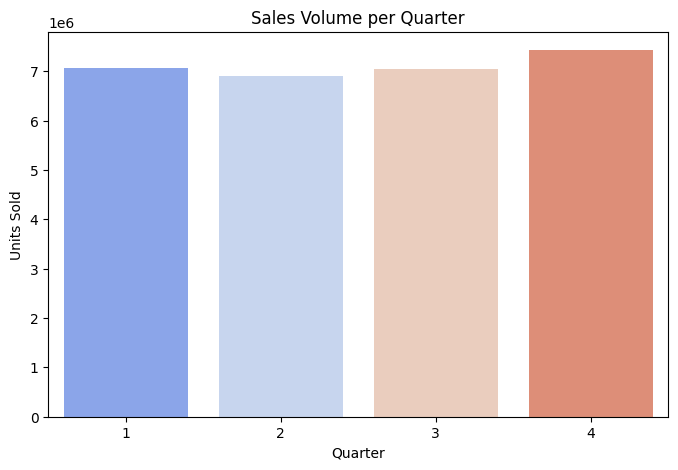

In [43]:
# Quarterly Sales
df["Quarter"] = ((df["Month_Numbered"] - 1) // 3) + 1
quarterly_sales = df.groupby("Quarter")["Units_Sold"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=quarterly_sales, x="Quarter", y="Units_Sold", palette="coolwarm")
plt.xlabel("Quarter")
plt.ylabel("Units Sold")
plt.title("Sales Volume per Quarter")
plt.show()

Looking at the bar plot, we could conclude that Quarter 4 has the highest sales due to the holiday season. 

3. What is the most popular product in a region or country?

In [44]:
# Finding the most popular product in each region
top_product = df.groupby(["Region", "Main_Category"])["Units_Sold"].sum().reset_index()
top_product = top_product.sort_values(by=["Region", "Units_Sold"], ascending=[True, False])
top_product = top_product.groupby("Region").first().reset_index()

print(top_product)

           Region Main_Category  Units_Sold
0         America       Apparel     1529686
1          Europe       Apparel     1306036
2   Greater China       Apparel     1662390
3           India     Equipment     1621198
4           Japan       Apparel     1568313
5     South Korea     Equipment     1706490
6  Southeast Asia     Equipment     1140001


America has the most units sold in the world and it is apparel!

4. How do discounts affect total revenue?

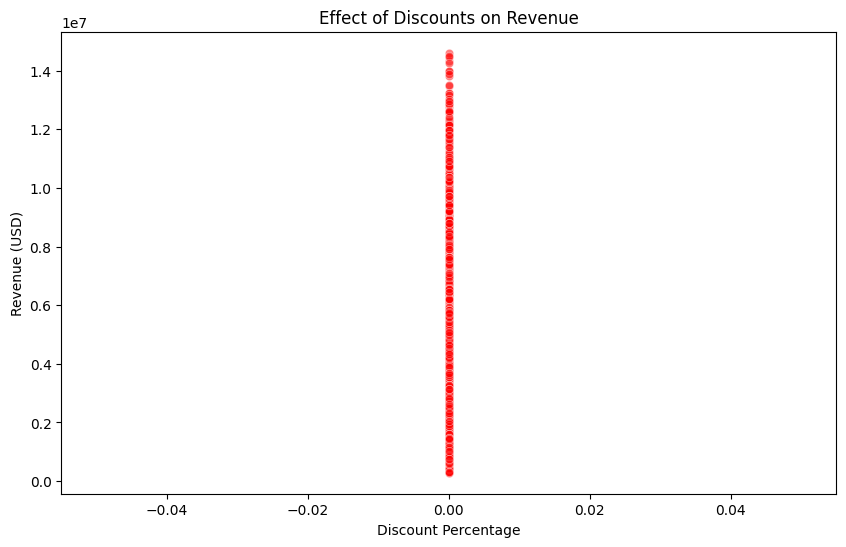

In [45]:
# Creating scatter plot showing discount affect on revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Discount_Percent", y="Revenue_USD", alpha=0.5, color="red")
plt.xlabel("Discount Percentage")
plt.ylabel("Revenue (USD)")
plt.title("Effect of Discounts on Revenue")
plt.show()

It seems like there isn't any discounts applied :(

5. Are there inventory issues in any region? (overstock or understock)

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34315/1171204935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_variability, x="Units_Sold", y="Region", palette="magma")


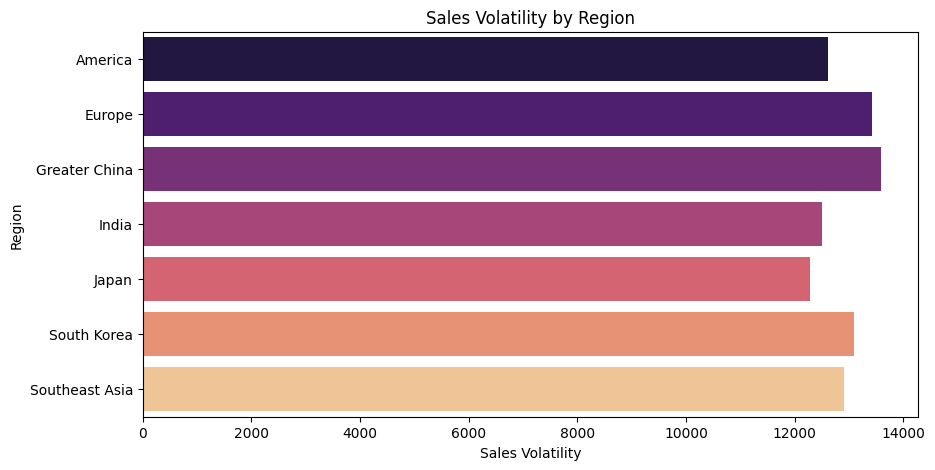

In [46]:
# Calculating the variation of sales per region
sales_variability = df.groupby("Region")["Units_Sold"].std().reset_index()

# Creating the plot
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_variability, x="Units_Sold", y="Region", palette="magma")
plt.xlabel("Sales Volatility") # Standard deviation
plt.ylabel("Region")
plt.title("Sales Volatility by Region")
plt.show()

Higher variability indicates unpredictable demand and could indicate potential stock issues.

We could expand on this project further in the future by building a model using linear regression to predict Revenue in USD, using the features "Units_Sold" and "Price_Tier"!

### Impact of this project

#### Benefits

- As someone working at Nike, I could use this analysis to optimize pricing strategies, marketing strategies, and inventory management based on the sales trends

- Understanding the consumer behavior would allow Nike to create personalized marketing strategies enhancing the customer experience

- Optimizing the inventory could reduce waste and overproduction supporting Nike's sustainability goals

#### Potential Harms

- The analysis was done favoring high revenue regions leading for wealthier markets to be prioritized. This could lead to reduced product availability and increased prices in some regions

- The dataset might not have captured external factors potentially leading to misleading conclusions

- Increasing prices per demand might lead customers to feel they are unfairly charged for products. 

#### What might be missing?

- Customer Demographics: Age, gender, income, and purchasing motivators

- Competitor Analysis: Information about competitors and how they are performing in the same regions is missing

- Marketing Data: The dataset does not include athlete endorsements, campaigns, and social media engagement

### References


- ChatGPT : I used ChatGPT to help me understand some aspects of this project, such as getting help with coding the visuals.
- Keggle.com : I used the Nike dataset from keggle
- Canvas : I used available resources from modules in Canvas